# Do a standard multitask scaffold split
Here we demonstrate ATOM's implementation of a multitask scaffold splitter. This not only separates the scaffolds that are in each subset, but also makes sure to balance the various tasks in a multitask dataset which could be sparse around some scaffolds. For example, the SLC datasets have good overlap but still some unique compounds and 2-set overlaps:
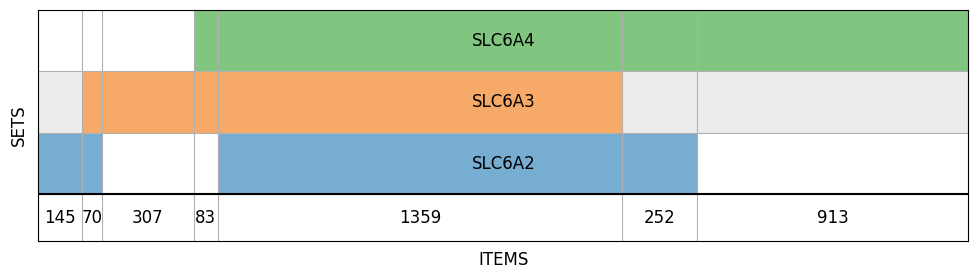

The multitask scaffold splitter is specifically designed to achieve a good balance between dataset response distribution and scaffold splitting for datasets like this. 

> **Note**: *This module can also be used, and is often beneficial, for single-task datasets as well.*

In [8]:
import atomsci.ddm.pipeline.model_pipeline as mp
import atomsci.ddm.pipeline.parameter_parser as parse
import atomsci.ddm.utils.split_response_dist_plots as srdp
import atomsci.ddm.utils.split_diagnostic_plots as sdp
import pandas as pd
import atomsci.ddm.utils.compare_splits_plots as csp
import matplotlib.pyplot as plt
import seaborn as sns

# Set for less chatty log messages
import logging
logger = logging.getLogger('ATOM')
logger.setLevel(logging.INFO)

INFO:ATOM:Using prefeaturized data; number of features = 200
INFO:ATOM:Splitting data by multitaskscaffold
INFO:ATOM:Duplicate ids or smiles in the dataset, will deduplicate first and assign all records per compound ID to same partition
INFO:ATOM:Requested 100 super scaffolds, produced 107 from 1147 original scaffolds
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
I

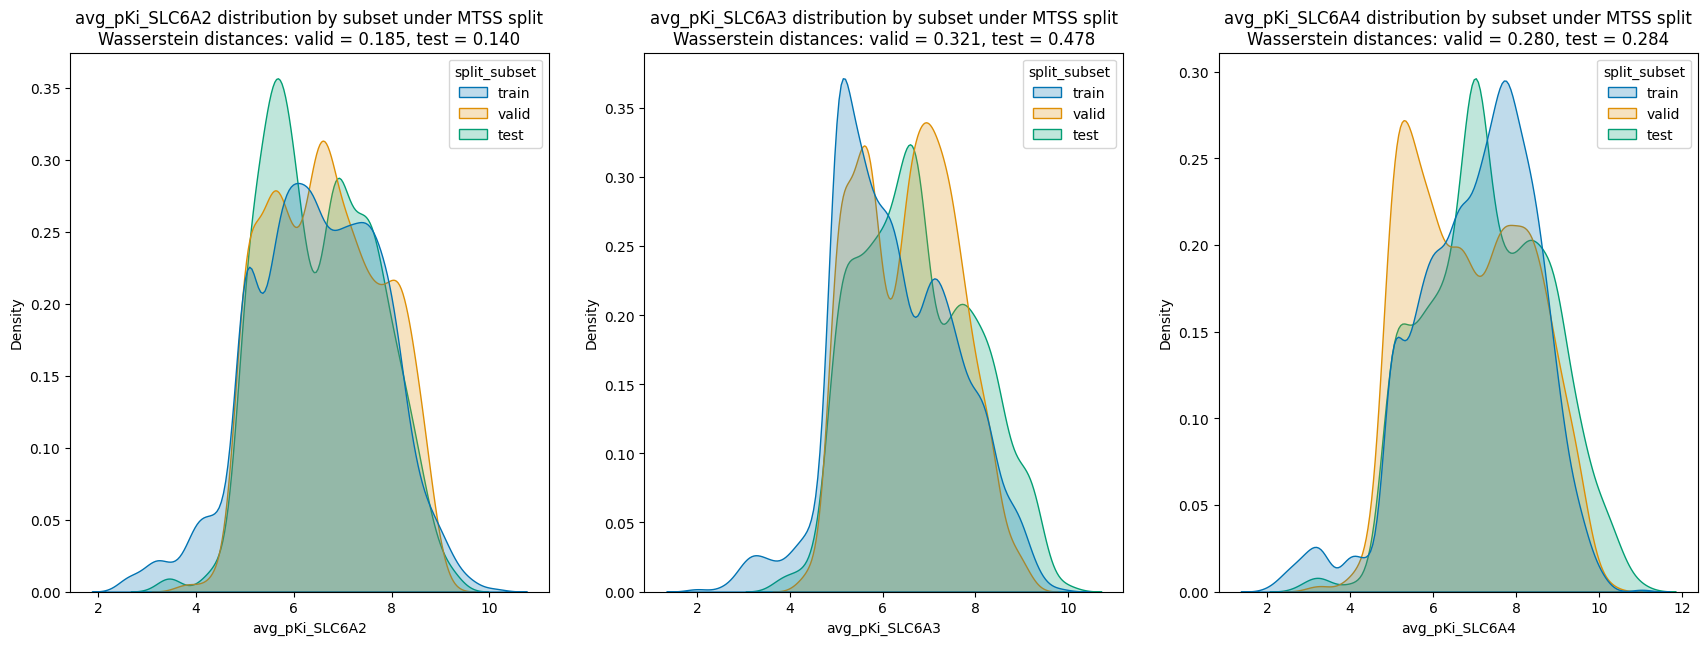

In [6]:
splitter = 'multitaskscaffold'
dset_file = 'dataset/SLC6A2_3_4.csv'
params = {
    "dataset_key" : dset_file,
    "splitter": splitter,
    "split_valid_frac": "0.20",
    "split_test_frac": "0.20",
    "split_strategy": "train_valid_test",
    "mtss_train_valid_dist_weight": "1.0",
    "mtss_train_test_dist_weight": "1.0",
    "mtss_split_fraction_weight": "1.0",
    "mtss_response_distr_weight": "0.0",
    "mtss_num_generations": "100",
    "mtss_num_super_scaffolds": "100",
    "previously_split": "False",
    "previously_featurized": "False",
    "prediction_type": "regression",
    "response_cols" : "avg_pKi_SLC6A2,avg_pKi_SLC6A3,avg_pKi_SLC6A4",
    "id_col": "compound_id",
    "smiles_col" : "base_rdkit_smiles",
    "result_dir": 'dataset/SLC6A2_3_4_models',
    # "model_type": "NN",
    "featurizer": "computed_descriptors",
    "descriptor_type": "rdkit_raw",
    "previously_featurized":"True",
    "learning_rate": ".0005",
    "layer_sizes": "128,64",
    "dropouts": "0.3,0.3",
    "max_epochs": "100",
    "early_stopping_patience": "50",
    "verbose": "True",
}
pparams = parse.wrapper(params)
MP = mp.ModelPipeline(pparams)
mtss_split_uuid = MP.split_dataset()

params = {
    "dataset_key" : dset_file,
    "splitter": splitter,
    "split_valid_frac": "0.20",
    "split_test_frac": "0.20",
    "split_strategy": "train_valid_test",
    "split_uuid": mtss_split_uuid,
    "response_cols" : "avg_pKi_SLC6A2,avg_pKi_SLC6A3,avg_pKi_SLC6A4",
    "id_col": "compound_id",
    "smiles_col" : "base_rdkit_smiles",
}
srdp.plot_split_subset_response_distrs(params)

The distributions of each subset look alright, but we can probably do better. Let's try increasing the `mtss_response_distr_weight` to 5.0. This will encourage the splitter to try to achieve more equal response distributions compared to scaffold distributions.


INFO:ATOM:Using prefeaturized data; number of features = 200
INFO:ATOM:Splitting data by multitaskscaffold
INFO:ATOM:Duplicate ids or smiles in the dataset, will deduplicate first and assign all records per compound ID to same partition
INFO:ATOM:Requested 100 super scaffolds, produced 107 from 1147 original scaffolds
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
I

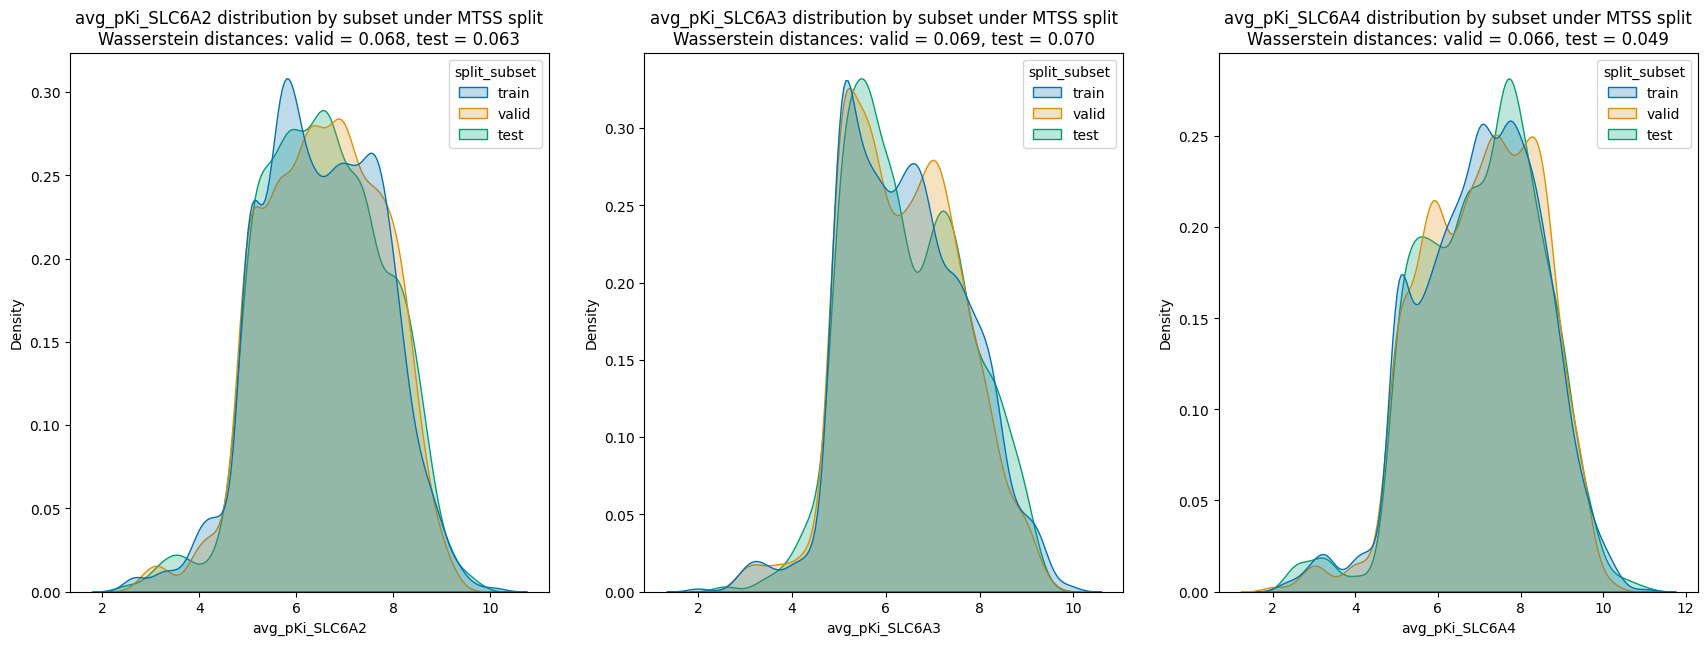

In [7]:
splitter = 'multitaskscaffold'
dset_file = 'dataset/SLC6A2_3_4.csv'
params = {
    "dataset_key" : dset_file,
    "splitter": splitter,
    "split_valid_frac": "0.20",
    "split_test_frac": "0.20",
    "split_strategy": "train_valid_test",
    "mtss_train_valid_dist_weight": "1.0",
    "mtss_train_test_dist_weight": "1.0",
    "mtss_split_fraction_weight": "1.0",
    "mtss_response_distr_weight": "5.0",
    "mtss_num_generations": "100",
    "mtss_num_super_scaffolds": "100",
    "previously_split": "False",
    "previously_featurized": "False",
    "prediction_type": "regression",
    "response_cols" : "avg_pKi_SLC6A2,avg_pKi_SLC6A3,avg_pKi_SLC6A4",
    "id_col": "compound_id",
    "smiles_col" : "base_rdkit_smiles",
    "result_dir": 'dataset/SLC6A2_3_4_models',
    "model_type": "NN",
    "featurizer": "computed_descriptors",
    "descriptor_type": "rdkit_raw",
    "previously_featurized":"True",
    "learning_rate": ".0005",
    "layer_sizes": "128,64",
    "dropouts": "0.3,0.3",
    "max_epochs": "100",
    "early_stopping_patience": "50",
    "verbose": "True",
}
pparams = parse.wrapper(params)
MP = mp.ModelPipeline(pparams)
mtss_split_uuid = MP.split_dataset()

params = {
    "dataset_key" : dset_file,
    "splitter": splitter,
    "split_valid_frac": "0.20",
    "split_test_frac": "0.20",
    "split_strategy": "train_valid_test",
    "split_uuid": mtss_split_uuid,
    "response_cols" : "avg_pKi_SLC6A2,avg_pKi_SLC6A3,avg_pKi_SLC6A4",
    "id_col": "compound_id",
    "smiles_col" : "base_rdkit_smiles",
}
srdp.plot_split_subset_response_distrs(params)

This split looks pretty good. We can analyze further below.

In [15]:
mtss_split_uuid

'cb709ab0-5592-477e-90fb-0de5ae506eb7'

## Jump in here to reuse previously created split

In [2]:
mtss_split_uuid = 'cb709ab0-5592-477e-90fb-0de5ae506eb7'

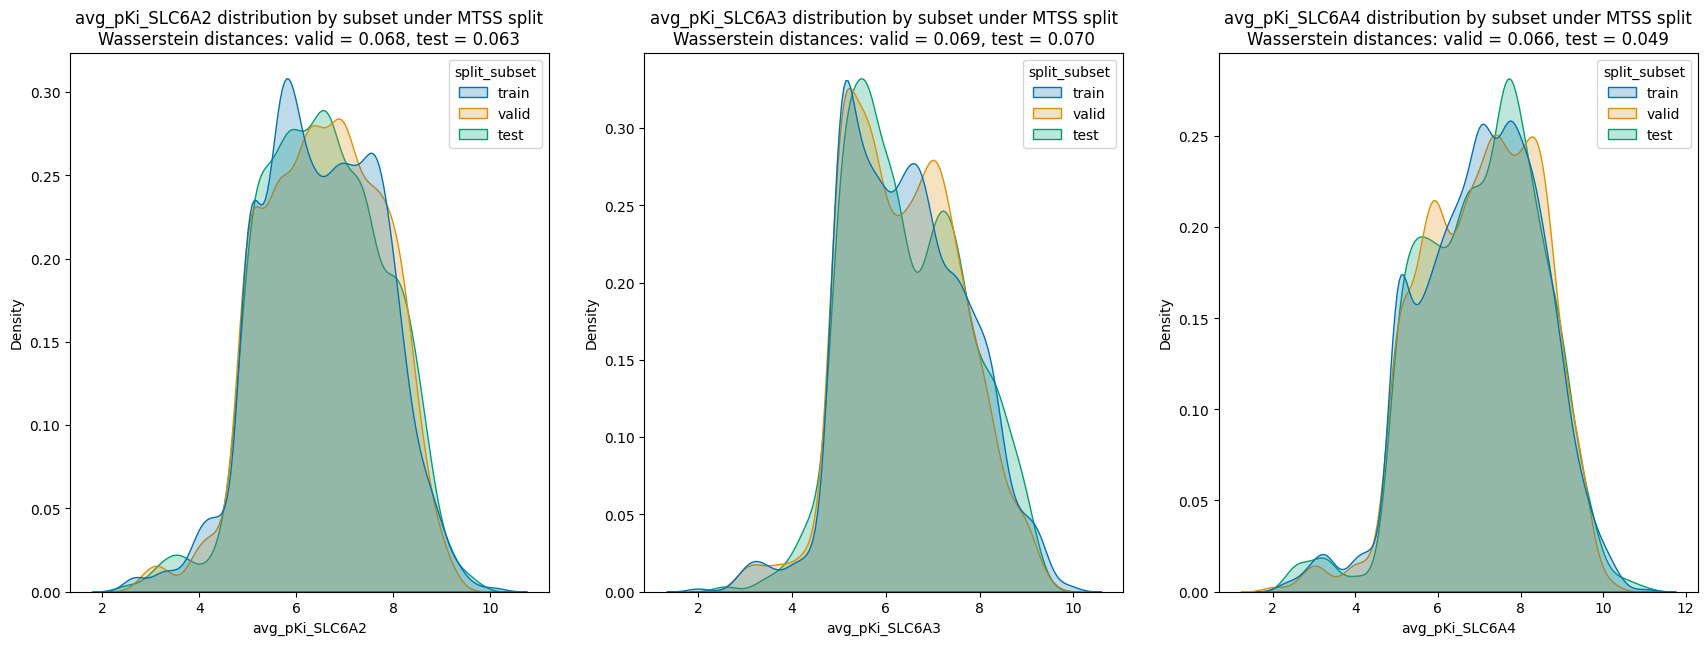

In [3]:
dset_file = 'dataset/SLC6A2_3_4.csv'
splitter = 'multitaskscaffold'
params = {
    "dataset_key" : dset_file,
    "splitter": splitter,
    "split_valid_frac": "0.20",
    "split_test_frac": "0.20",
    "split_strategy": "train_valid_test",
    "split_uuid": mtss_split_uuid,
    "response_cols" : "avg_pKi_SLC6A2,avg_pKi_SLC6A3,avg_pKi_SLC6A4",
    "id_col": "compound_id",
    "smiles_col" : "base_rdkit_smiles",
}
srdp.plot_split_subset_response_distrs(params)

The [Wasserstein distance](https://en.wikipedia.org/wiki/Wasserstein_metric) or "earth-moving" distance is the minimum cost to convert the validation or test distribution into the training distribution. You can think of each distribution like a pile of soil and the metric is how much work it would be to create the training "pile shape" from the existing validation or test "pile shape". A higher number would indicate that the distributions are less alike.

In [4]:
srdp.compute_split_subset_wasserstein_distances(params)

,response_col,split_subset,distance
0,avg_pKi_SLC6A2,valid,0.068268
1,avg_pKi_SLC6A2,test,0.062654
2,avg_pKi_SLC6A3,valid,0.068892
3,avg_pKi_SLC6A3,test,0.069692
4,avg_pKi_SLC6A4,valid,0.065527
5,avg_pKi_SLC6A4,test,0.048596


In [12]:
df=pd.read_csv('dataset/SLC6A2_3_4.csv')
split=pd.read_csv('dataset/SLC6A2_3_4_train_valid_test_multitaskscaffold_cb709ab0-5592-477e-90fb-0de5ae506eb7.csv')
split_df=df.merge(split, left_on='compound_id', right_on='cmpd_id')
split_df.head()

,compound_id,base_rdkit_smiles,relation_SLC6A2,avg_pKi_SLC6A2,relation_SLC6A3,avg_pKi_SLC6A3,relation_SLC6A4,avg_pKi_SLC6A4,cmpd_id,subset,fold
0,CHEMBL100879,COc1cc2c(cc1OC)C1=NO[C@@H](CN3CCN(C/C=C(\C)c4c...,NaN,NaN,NaN,NaN,NaN,7.130768,CHEMBL100879,train,0
1,CHEMBL101055,COc1cccc(C(CN(C)C)C2(O)CCCCC2)c1,NaN,6.500313,NaN,NaN,NaN,NaN,CHEMBL101055,valid,0
2,CHEMBL101361,COc1cc2c(cc1OC)C1=NO[C@@H](CN3CCN(C/C=C(\C)c4c...,NaN,NaN,NaN,NaN,NaN,7.292430,CHEMBL101361,train,0
3,CHEMBL101411,COc1cc2c(cc1OC)C1=NO[C@@H](CN3CCN(C/C=C/c4ccc(...,NaN,NaN,NaN,NaN,NaN,8.886057,CHEMBL101411,train,0
4,CHEMBL101596,COc1cc2c(cc1OC)C1=NO[C@@H](CN3CCN(C/C(C)=C/c4c...,NaN,NaN,NaN,NaN,NaN,8.721246,CHEMBL101596,train,0


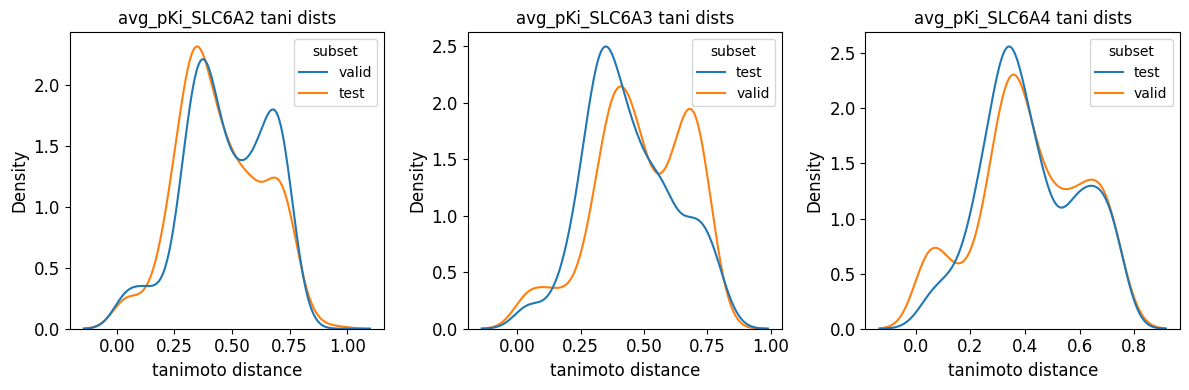

In [13]:
from atomsci.ddm.pipeline import diversity_plots as dp
import importlib
importlib.reload(dp)

response_cols=["avg_pKi_SLC6A2","avg_pKi_SLC6A3","avg_pKi_SLC6A4",]
fig, ax = plt.subplots(1,3, figsize=(12,4))
for i, resp in enumerate(response_cols):
    dp.plot_tani_dist_distr(split_df[split_df[resp].notna()], 'base_rdkit_smiles', resp, radius=4, subsets=True, ax=ax[i])
    ax[i].set_title(f'{resp} tani dists')
fig.tight_layout()

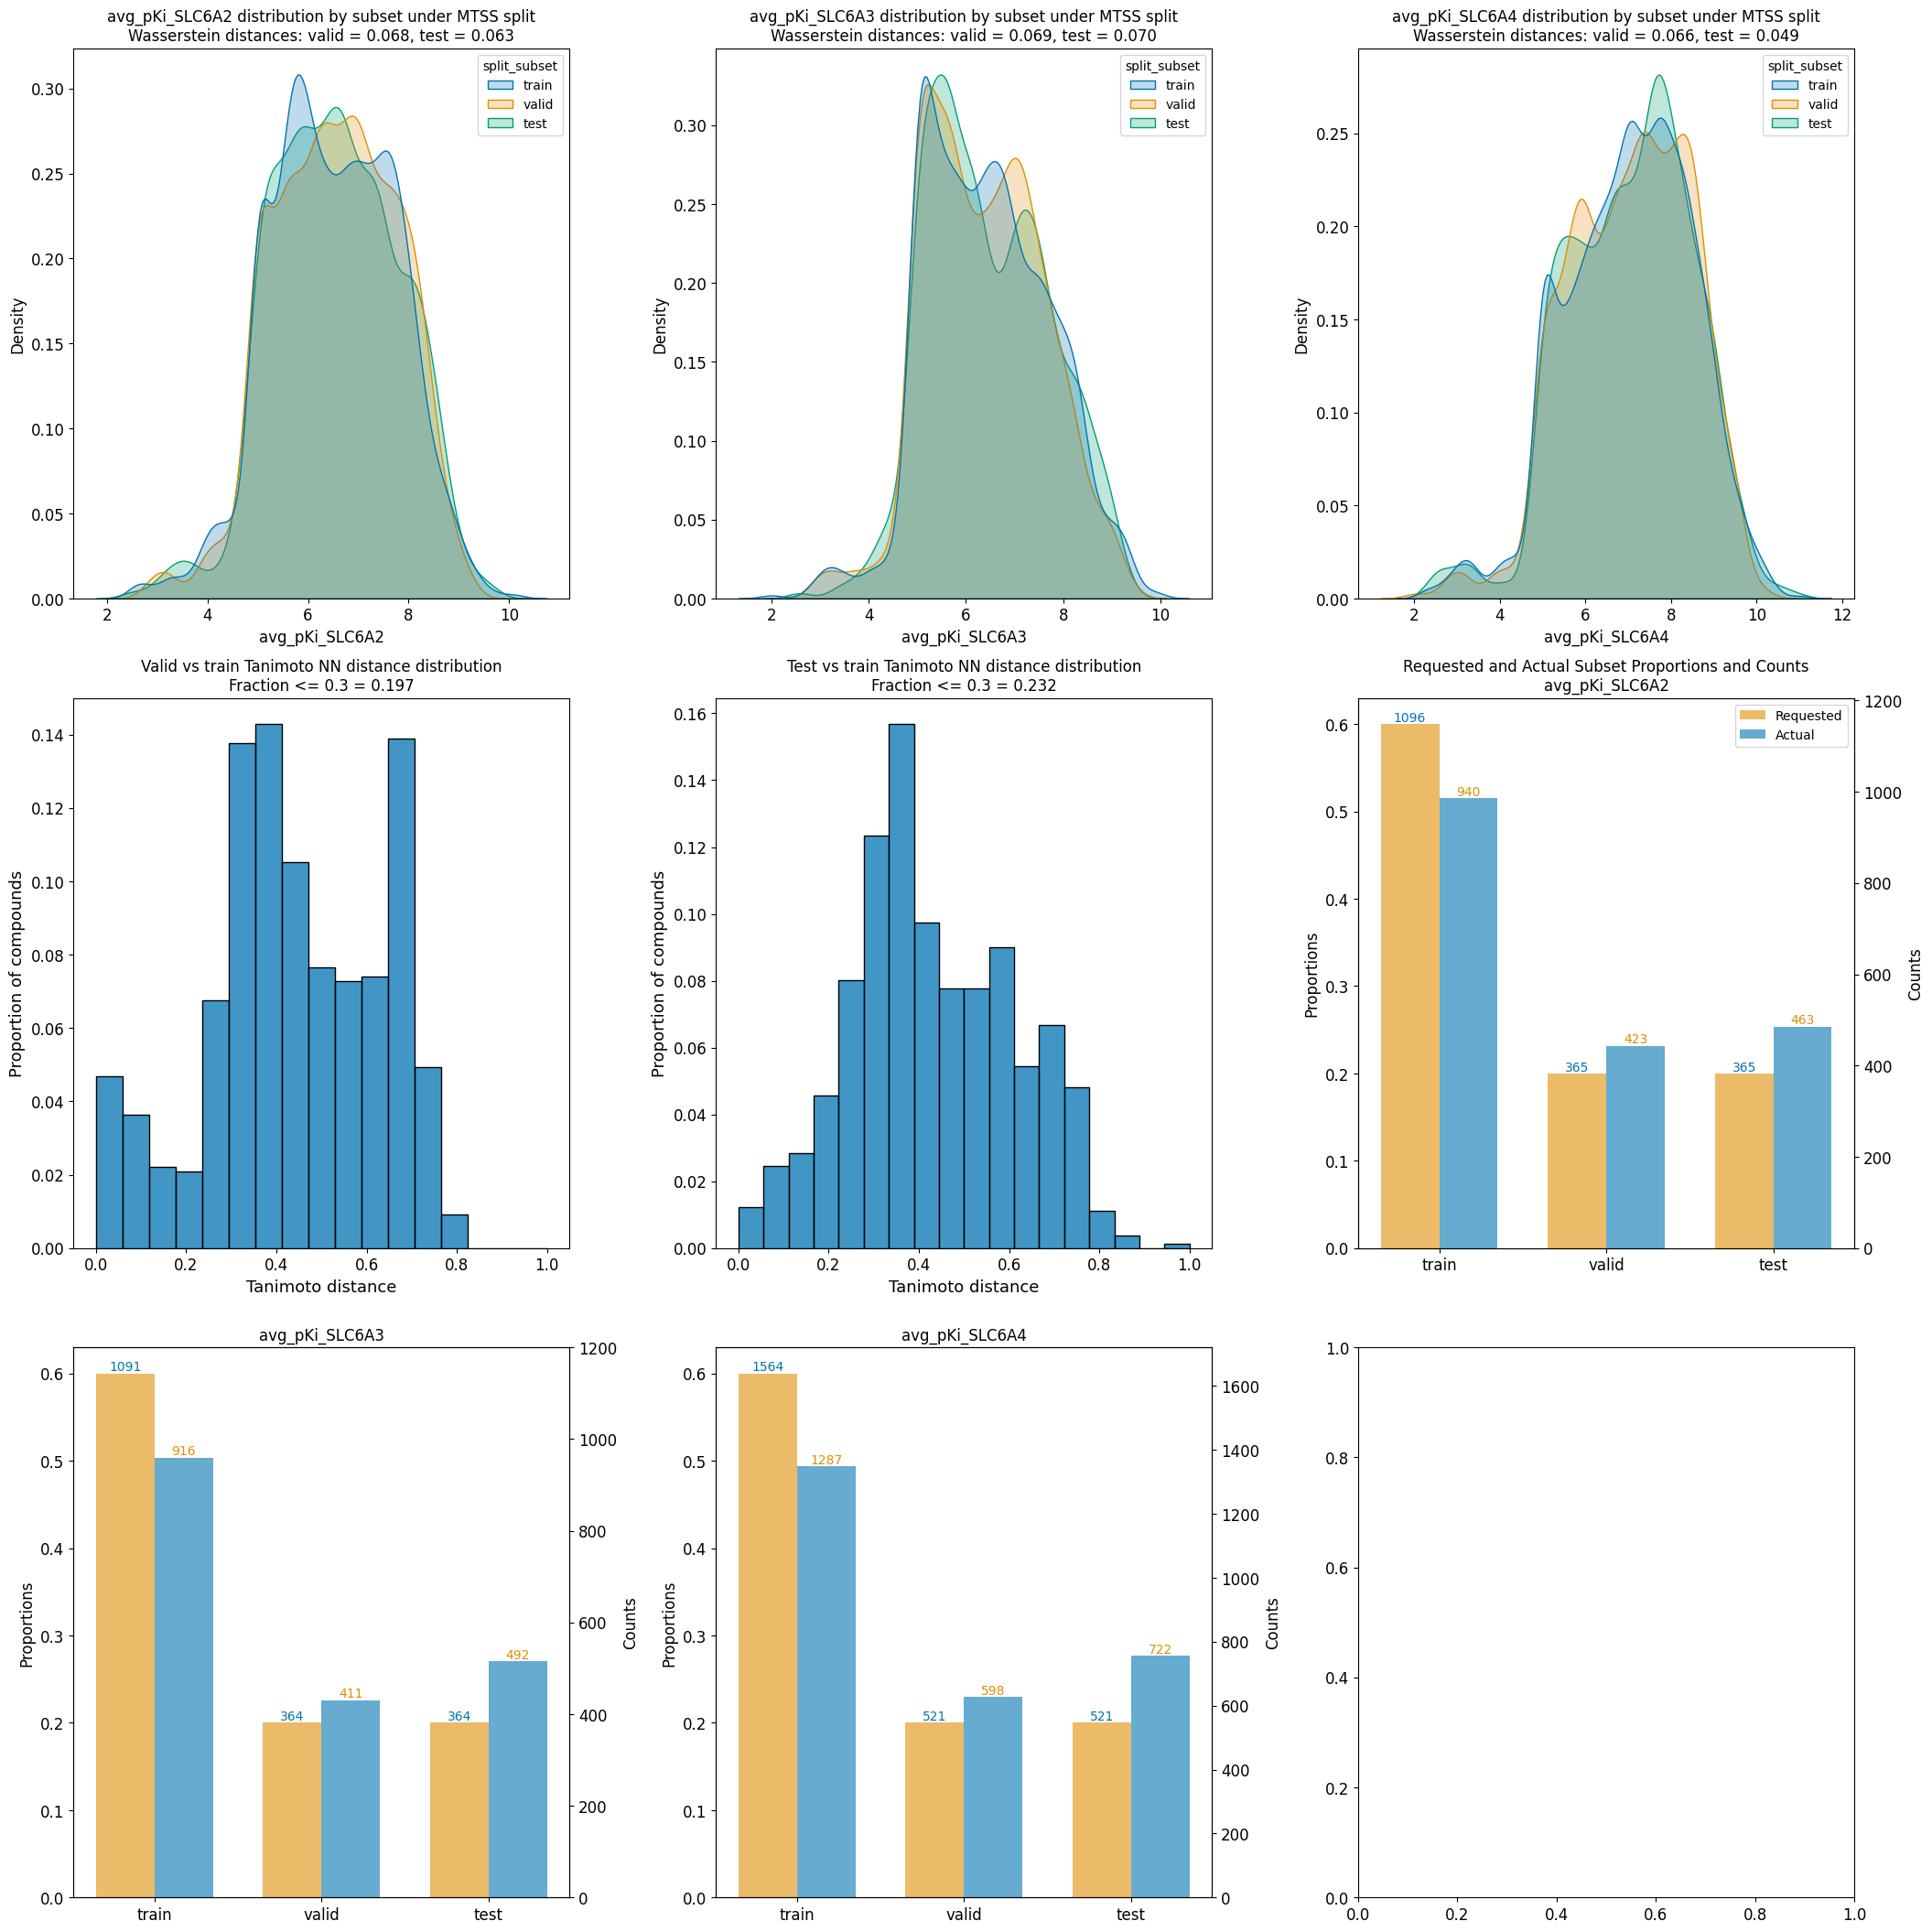

In [18]:
params = {
    "dataset_key" : dset_file,
    "splitter": splitter,
    "split_valid_frac": "0.20",
    "split_test_frac": "0.20",
    "split_strategy": "train_valid_test",
    "split_uuid": mtss_split_uuid,
    "response_cols" : "avg_pKi_SLC6A2,avg_pKi_SLC6A3,avg_pKi_SLC6A4",
    "id_col": "compound_id",
    "smiles_col" : "base_rdkit_smiles",
    "num_folds":1,
}

sdp.plot_split_diagnostics(params, num_cols=3)

# Train a multitask model using ECFP features

In [ ]:
import atomsci.ddm.pipeline.perf_plots as pp

params = {
    "dataset_key" : dset_file,
    "splitter": splitter,
    "split_valid_frac": "0.20",
    "split_test_frac": "0.20",
    "split_strategy": "train_valid_test",
    "mtss_train_valid_dist_weight": "1.0",
    "mtss_train_test_dist_weight": "1.0",
    "mtss_split_fraction_weight": "1.0",
    "mtss_response_distr_weight": "3.0",
    "mtss_num_generations": "25",
    "mtss_num_super_scaffolds": "100",
    "previously_split": "True",
    "previously_featurized": "True",
    "split_uuid": mtss_split_uuid,
    "prediction_type": "regression",
    "response_cols" : "avg_pKi_SLC6A2,avg_pKi_SLC6A3,avg_pKi_SLC6A4",
    "id_col": "compound_id",
    "smiles_col" : "base_rdkit_smiles",
    "result_dir": 'dataset/SLC6A2_3_4_models',
    "model_type": "NN",
    "featurizer": "ecfp",
    "descriptor_type": "ecfp",
    "learning_rate": ".0005",
    "layer_sizes": "128,64",
    "dropouts": "0.3,0.3",
    "max_epochs": "100",
    "early_stopping_patience": "50",
    "verbose": "True",
}
pparams = parse.wrapper(params)
mtss_MP = mp.ModelPipeline(pparams)
mtss_MP.train_model()

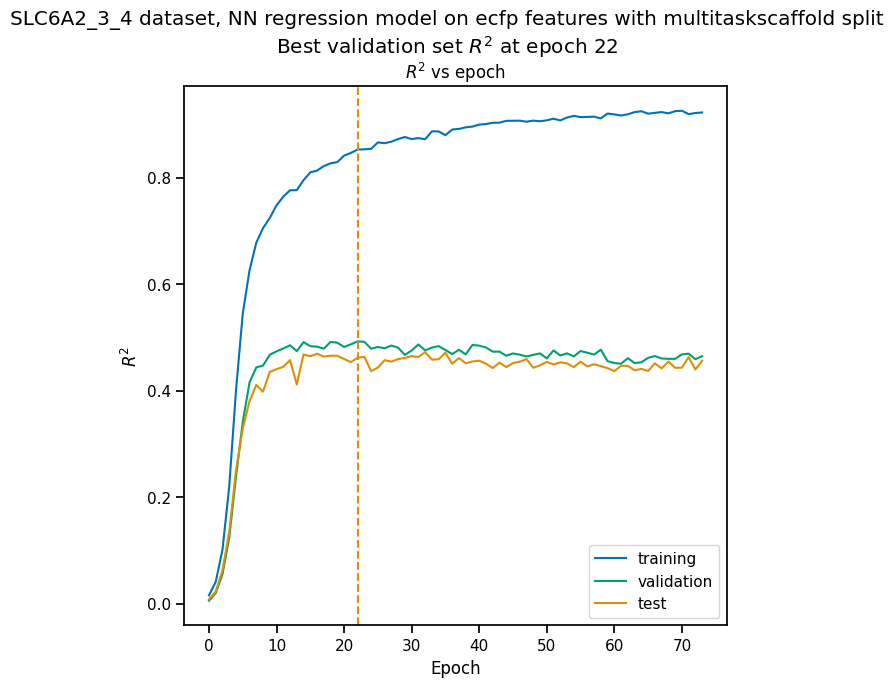

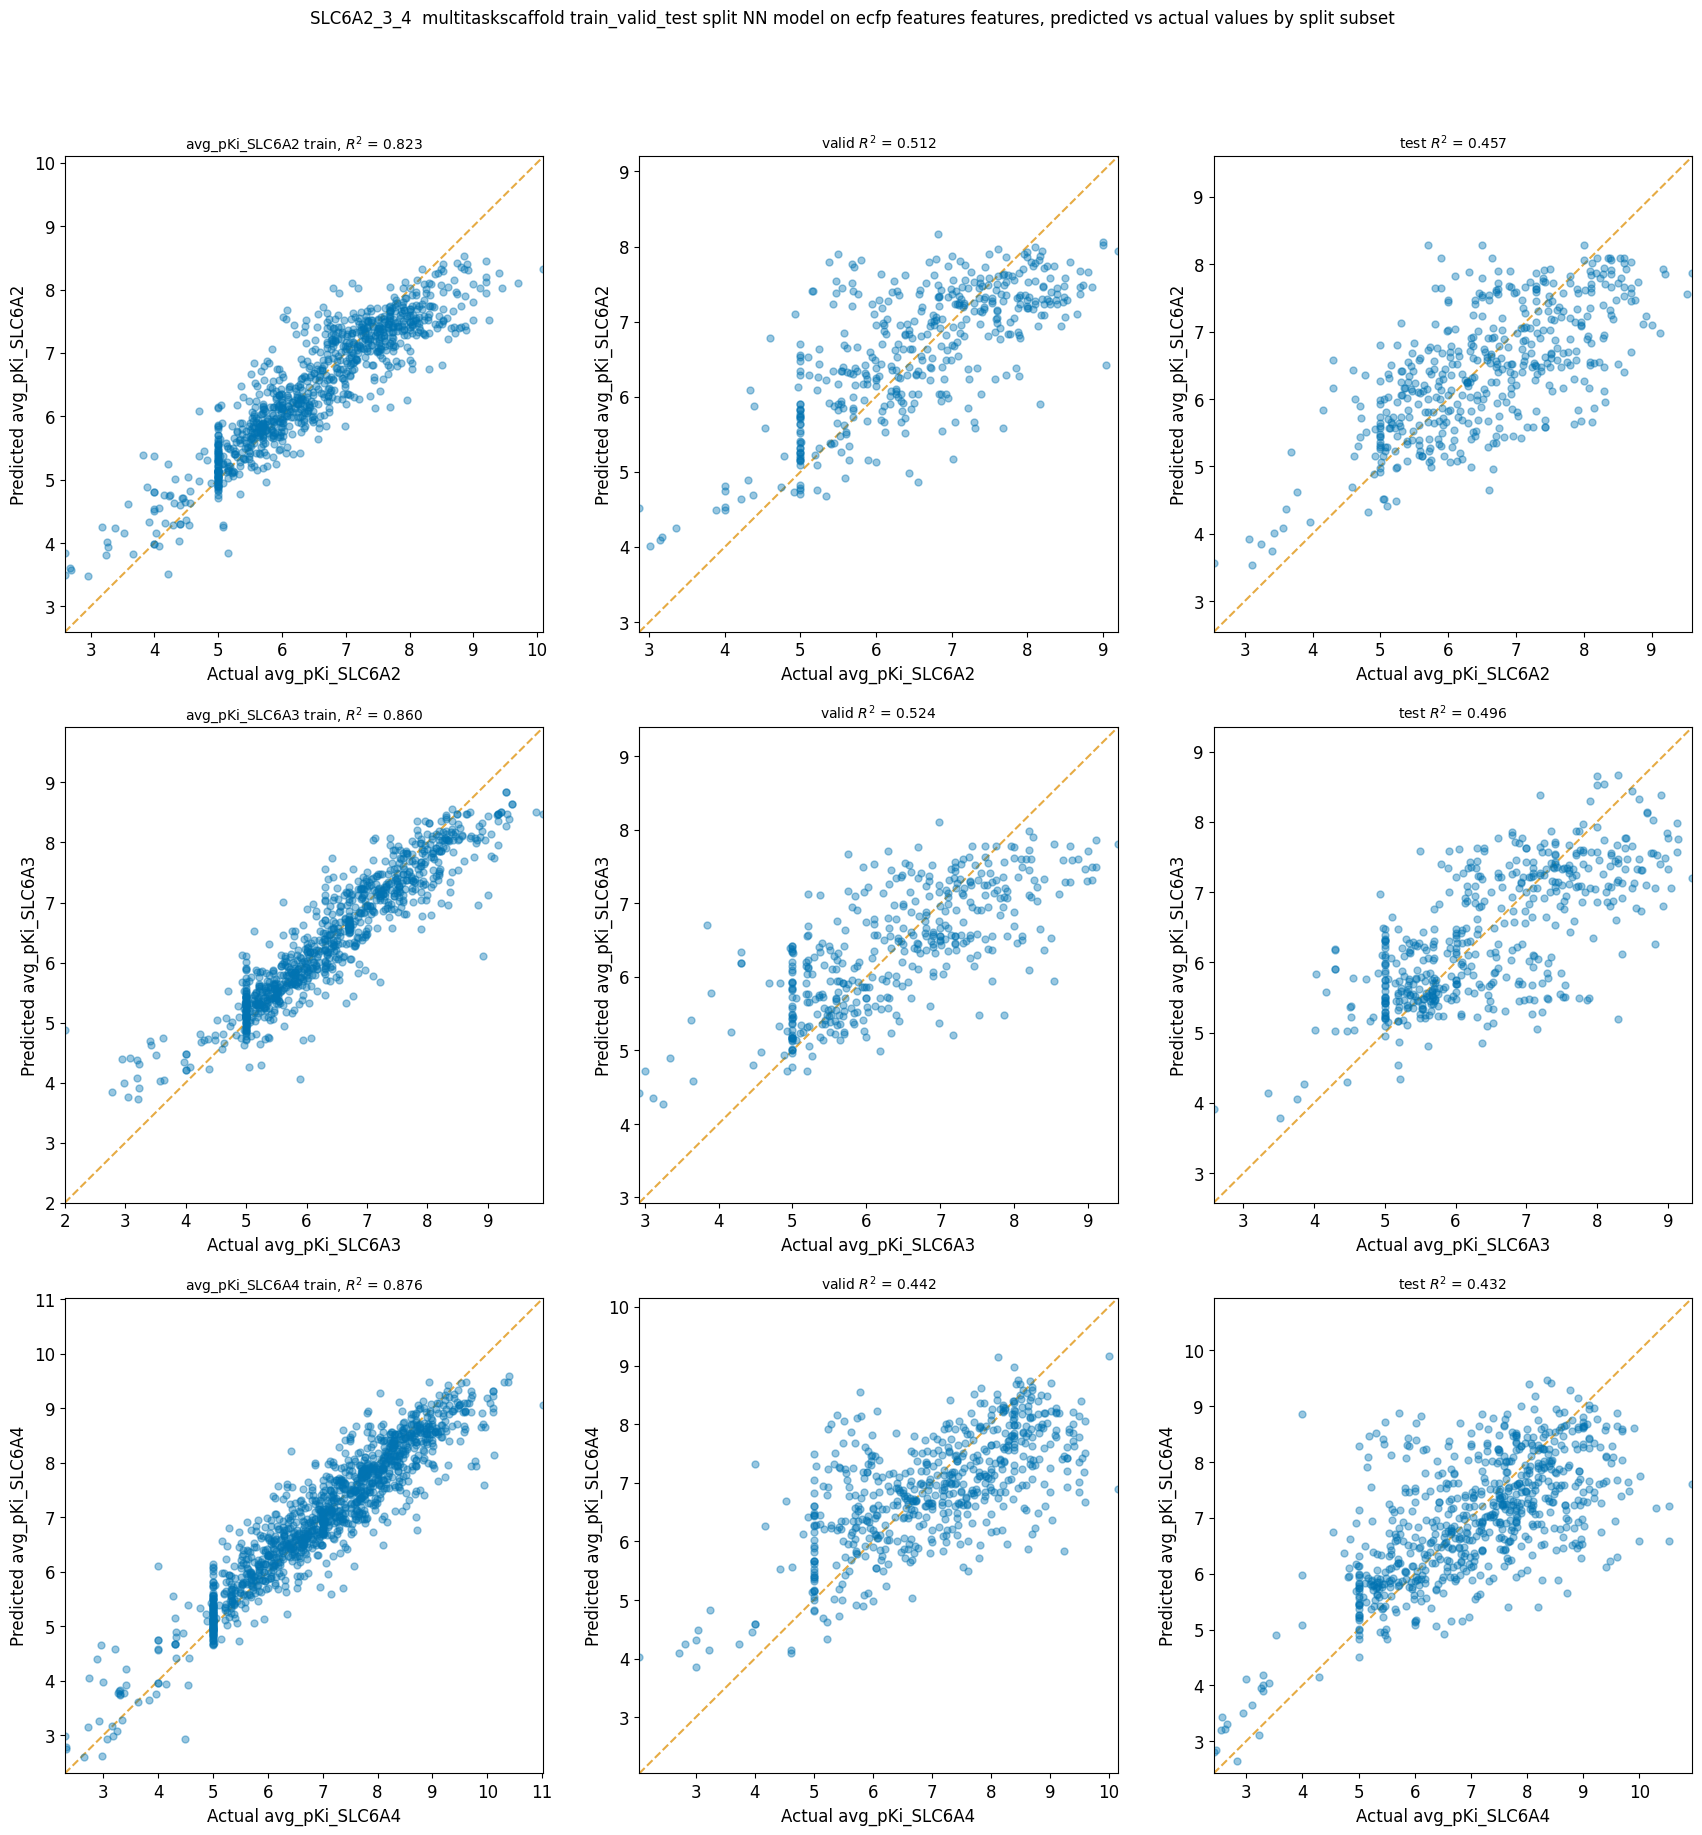

In [21]:
pp.plot_perf_vs_epoch(mtss_MP)
pp.plot_pred_vs_actual(mtss_MP)

## Train a multitask model with MOE features

In [22]:
params = {
    "dataset_key" : dset_file,
    "splitter": splitter,
    "split_valid_frac": "0.20",
    "split_test_frac": "0.20",
    "split_strategy": "train_valid_test",
    "mtss_train_valid_dist_weight": "1.0",
    "mtss_train_test_dist_weight": "1.0",
    "mtss_split_fraction_weight": "1.0",
    "mtss_response_distr_weight": "3.0",
    "mtss_num_generations": "25",
    "mtss_num_super_scaffolds": "100",
    "previously_split": "True",
    "previously_featurized": "True",
    "split_uuid": mtss_split_uuid,
    "prediction_type": "regression",
    "response_cols" : "avg_pKi_SLC6A2,avg_pKi_SLC6A3,avg_pKi_SLC6A4",
    "id_col": "compound_id",
    "smiles_col" : "base_rdkit_smiles",
    "result_dir": 'dataset/SLC6A2_3_4_models',
    "model_type": "NN",
    "featurizer": "computed_descriptors",
    "descriptor_type": "rdkit_raw",
    "learning_rate": ".0005",
    "layer_sizes": "128,64",
    "dropouts": "0.3,0.3",
    "max_epochs": "100",
    "early_stopping_patience": "50",
    "verbose": "True",
}
pparams = parse.wrapper(params)
mtss_MP = mp.ModelPipeline(pparams)
mtss_MP.train_model()

INFO:ATOM:Using prefeaturized data; number of features = 200
INFO:ATOM:Wrote transformers to dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/af244176-e44e-4b0f-8c7b-cd0f7d7da4cf/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming feature data
/Users/apaulson/repos/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming feature data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming feature data
INFO:ATOM:Total score for epoch 0 is 0.0123
INFO:ATOM:Epoch 0: training mean-r2_score = 0.040, validation mean-r2_score = 0.012, test mean-r2_score = 0.024
INFO:ATOM:*** Total score for epoch 1 is 0.0403, is new maximum
INFO:ATOM:Epoch 1: training mean-r2_score = 0.090, validation mean-r2_score = 0.040, test mean-r2_score = 0.062
INFO:ATOM:*** Total sco

['dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/af244176-e44e-4b0f-8c7b-cd0f7d7da4cf/model/checkpoint1.pt', 'dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/af244176-e44e-4b0f-8c7b-cd0f7d7da4cf/model/checkpoint2.pt', 'dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/af244176-e44e-4b0f-8c7b-cd0f7d7da4cf/model/checkpoint3.pt', 'dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/af244176-e44e-4b0f-8c7b-cd0f7d7da4cf/model/checkpoint4.pt', 'dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/af244176-e44e-4b0f-8c7b-cd0f7d7da4cf/model/checkpoint5.pt']
dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/af244176-e44e-4b0f-8c7b-cd0f7d7da4cf/model/checkpoint1.pt


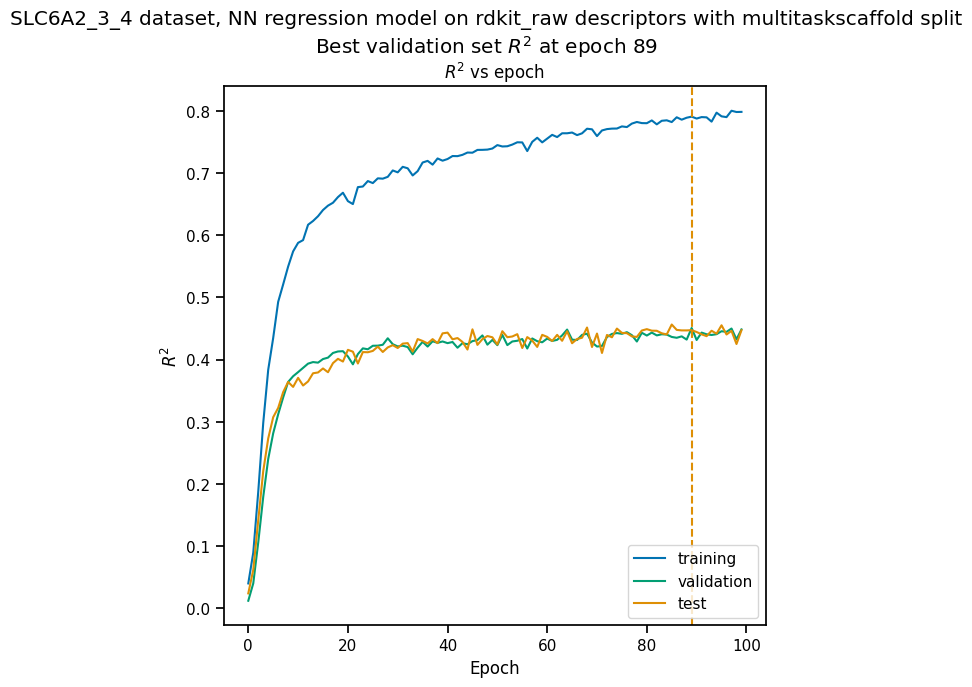

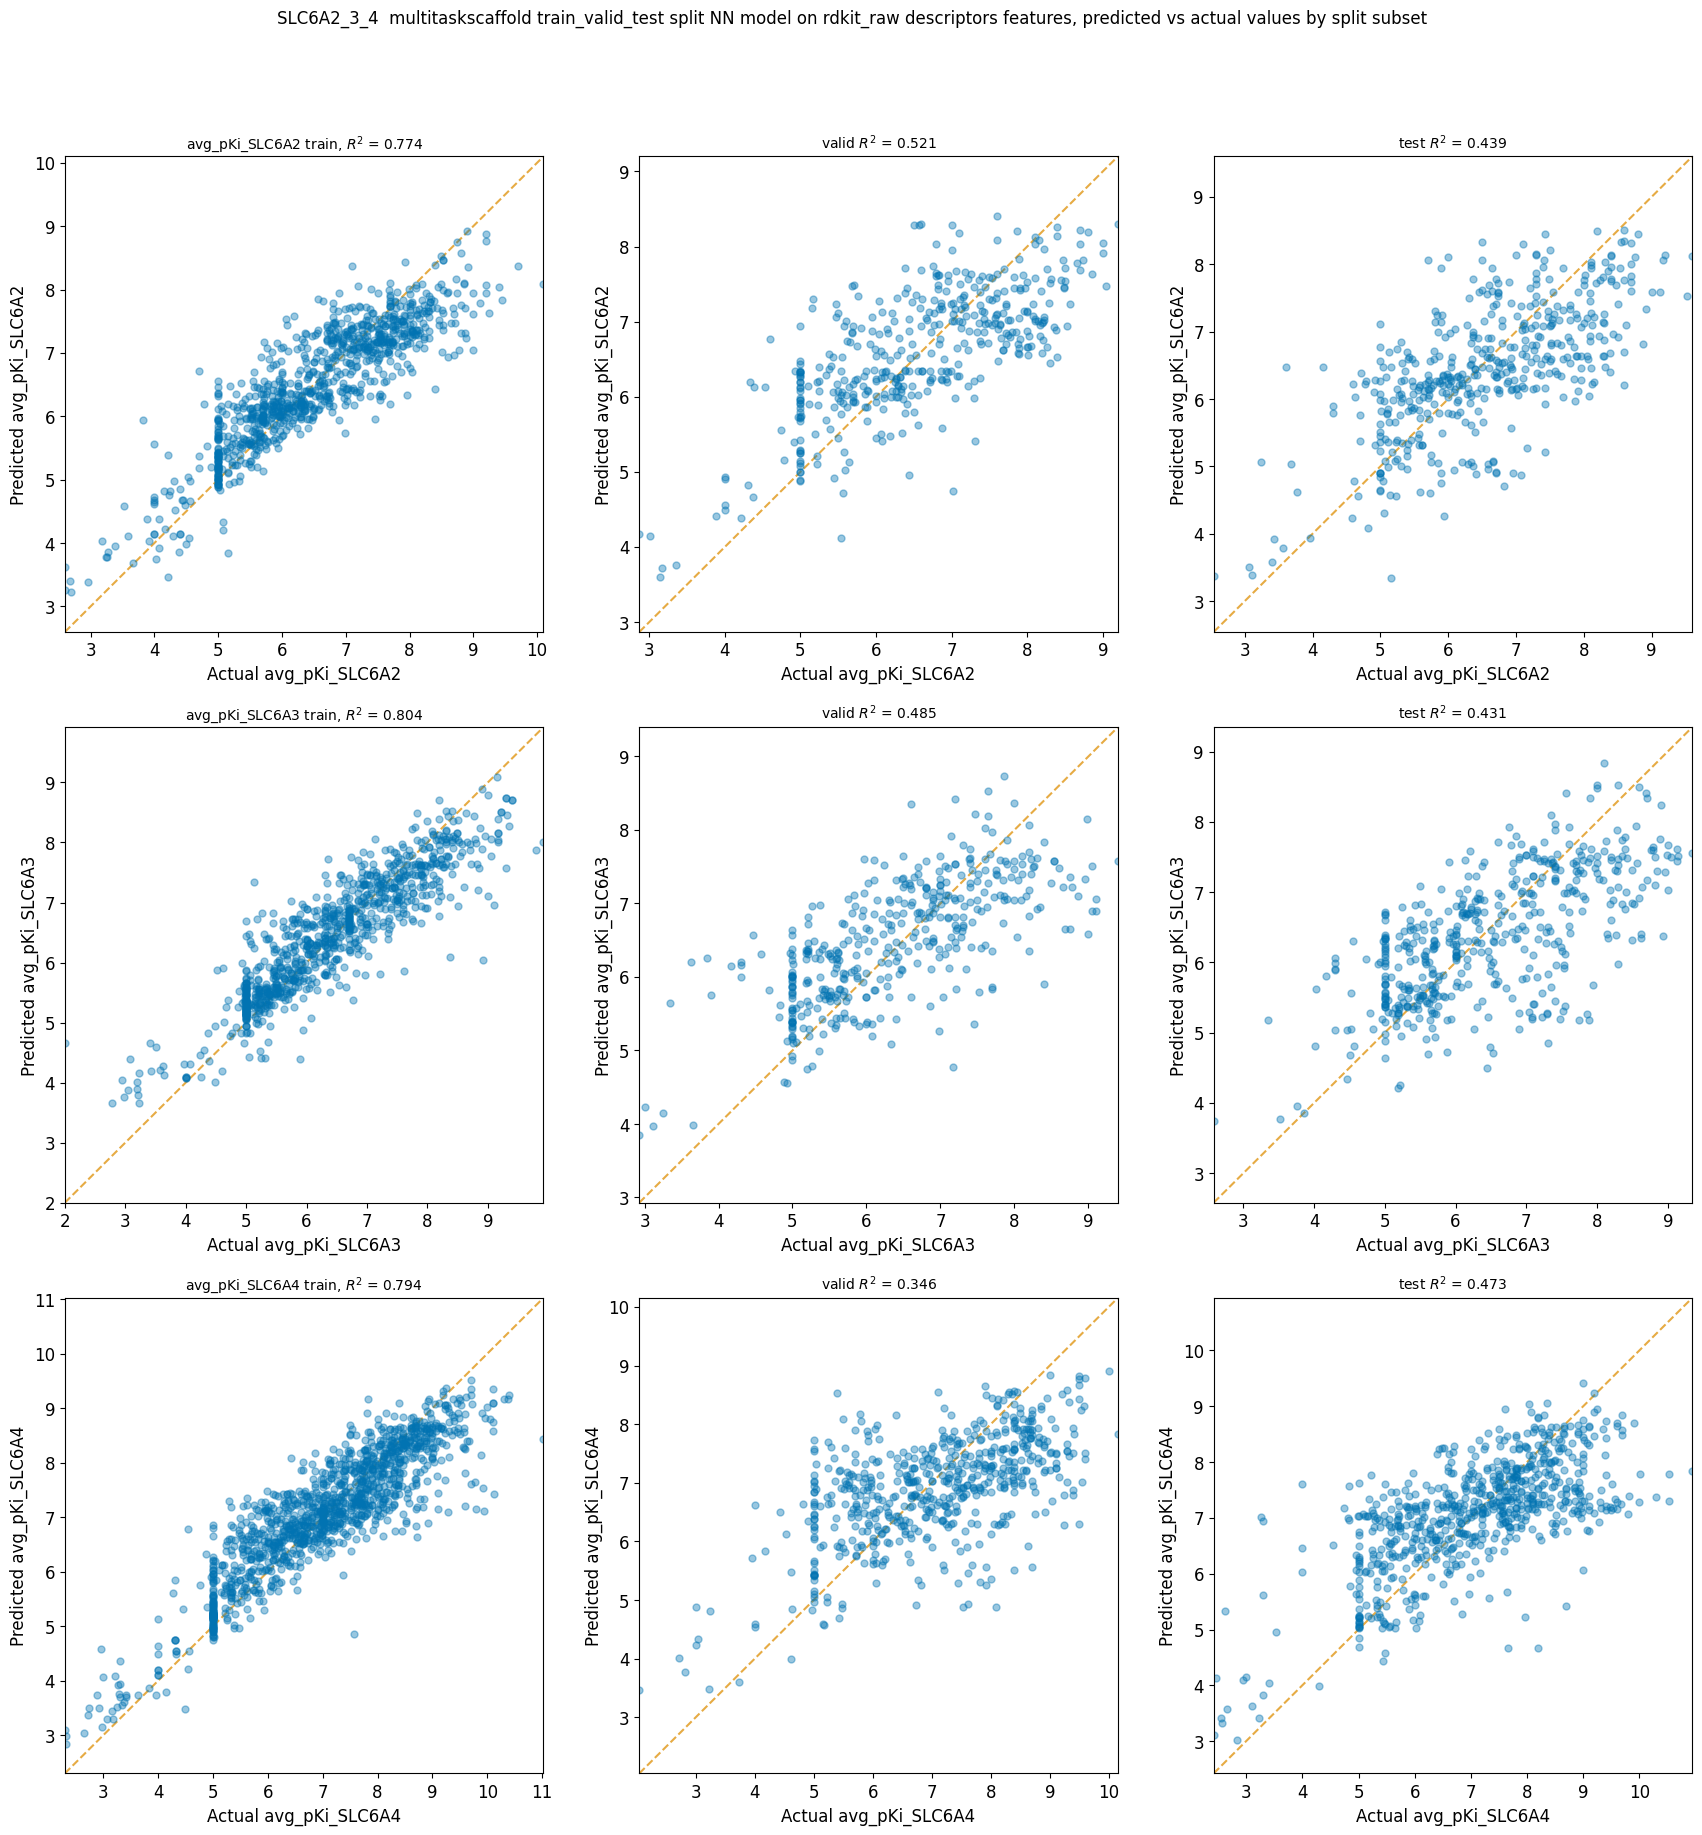

In [23]:
pp.plot_perf_vs_epoch(mtss_MP)
pp.plot_pred_vs_actual(mtss_MP)